### Env

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import scipy.stats as stats

from importlib import reload

In [18]:
import modeling_utils
reload(modeling_utils)
from modeling_utils import *

### Data

In [10]:
rt1_trunc = pd.read_csv("rt1_trunc.csv", index_col=0).iloc[:, 0]
rt10_trunc = pd.read_csv("rt10_trunc.csv", index_col=0).iloc[:, 0]

In [11]:
rt1_trunc.head()

timestamp
1759276800500    0.000000
1759276800600    0.000005
1759276800700    0.000000
1759276800800    0.000000
1759276800900    0.000015
Name: vwap, dtype: float64

### Modeling

# Regression

#### Benchmark

In [12]:
rt10_trunc.isna().sum()

np.int64(0)

In [15]:
model = LinearRegression()
scores = predict_r2(model, rt10_trunc, pd.DataFrame(rt10_trunc), lag=10, cv=10)
scores.mean()

np.float64(0.009788527743773002)

#### Features Engineering

In [17]:
features = feature_shift(rt10_trunc, list(range(0, 11)))
model = LinearRegression()
scores = predict_r2(model, rt10_trunc, features, lag=10, cv=10)
scores.mean()

np.float64(0.010981675853335416)

In [ ]:
rt1_features = feature_shift(rt1_trunc, list(range(0, 11)))
model = LinearRegression()
scores = predict_r2(model, rt10_trunc, rt1_features, lag=10, cv=10)
scores.mean()

np.float64(0.011271479458495737)

In [19]:
rt1_features = feature_shift(rt1_trunc, list(range(0, 11)))
rt10_features = feature_shift(rt10_trunc, list(range(0, 11)))
features_list = [rt1_features, rt10_features]
model = LinearRegression()
scores = predict_r2(model, rt10_trunc, feature_concat(features_list), lag=10, cv=10)
scores.mean()

np.float64(0.01171876604966865)

In [ ]:
fs = [10, 20, 30, 40, 50, 60, 70 ,80]
mean_scores = []
model = LinearRegression()
for f in fs:
  features = feature_shift(rt10_trunc, list(range(0, f+1)))
  scores = predict_r2(model, rt10_trunc, features, lag=10, cv=10)
  mean_scores.append(scores.mean())

<Axes: >

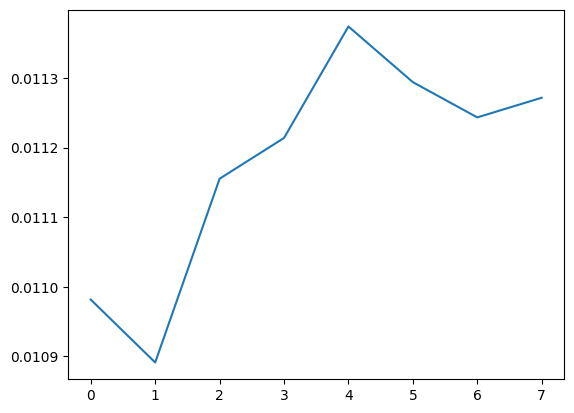

In [ ]:
pd.Series(mean_scores).plot()

# Classification